In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


In [3]:
# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)


In [4]:
data = []
labels = []

In [5]:
image_files = [f for f in glob.glob(r'gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [6]:
# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

In [7]:
# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


In [8]:
# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

In [9]:
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)


In [10]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [11]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [12]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [13]:
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Users\Pranav Pathak\Desktop\GDproject\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

C:\Users\Pranav Pathak\AppData\Local\Temp\ipykernel_12180\3811416611.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100
28/28 [==============================] - 18s 560ms/step - loss: 0.7460 - accuracy: 0.7092 - val_loss: 0.7363 - val_accuracy: 0.4827
Epoch 2/100
28/28 [==============================] - 15s 535ms/step - loss: 0.5116 - accuracy: 0.8085 - val_loss: 0.8095 - val_accuracy: 0.4870
Epoch 3/100
28/28 [==============================] - 15s 527ms/step - loss: 0.4417 - accuracy: 0.8332 - val_loss: 0.6432 - val_accuracy: 0.6169
Epoch 4/100
28/28 [==============================] - 15s 523ms/step - loss: 0.3643 - accuracy: 0.8563 - val_loss: 1.1854 - val_accuracy: 0.5195
Epoch 5/100
28/28 [==============================] - 15s 518ms/step - loss: 0.3244 - accuracy: 0.8782 - val_loss: 1.0084 - val_accuracy: 0.5325
Epoch 6/100
28/28 [==============================] - 15s 528ms/step - loss: 0.2970 - accuracy: 0.8815 - val_loss: 0.8586 - val_accuracy: 0.5325
Epoch 7/100
28/28 [==============================] - 15s 528ms/step - loss: 0.2564 - accuracy: 0.9017 - val_loss: 1.8707 - val_accuracy:

28/28 [==============================] - 15s 512ms/step - loss: 0.0527 - accuracy: 0.9803 - val_loss: 0.2133 - val_accuracy: 0.9416
Epoch 58/100
28/28 [==============================] - 15s 526ms/step - loss: 0.0503 - accuracy: 0.9815 - val_loss: 0.1609 - val_accuracy: 0.9524
Epoch 59/100
28/28 [==============================] - 15s 533ms/step - loss: 0.0591 - accuracy: 0.9798 - val_loss: 0.4013 - val_accuracy: 0.9026
Epoch 60/100
28/28 [==============================] - 14s 506ms/step - loss: 0.0470 - accuracy: 0.9832 - val_loss: 0.1856 - val_accuracy: 0.9351
Epoch 61/100
28/28 [==============================] - 15s 528ms/step - loss: 0.0504 - accuracy: 0.9798 - val_loss: 0.6764 - val_accuracy: 0.8506
Epoch 62/100
28/28 [==============================] - 15s 521ms/step - loss: 0.0464 - accuracy: 0.9809 - val_loss: 0.1160 - val_accuracy: 0.9654
Epoch 63/100
28/28 [==============================] - 15s 516ms/step - loss: 0.0532 - accuracy: 0.9809 - val_loss: 0.7158 - val_accuracy: 0.870

In [15]:
# save the model to disk
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


INFO:tensorflow:Assets written to: gender_detection.model\assets


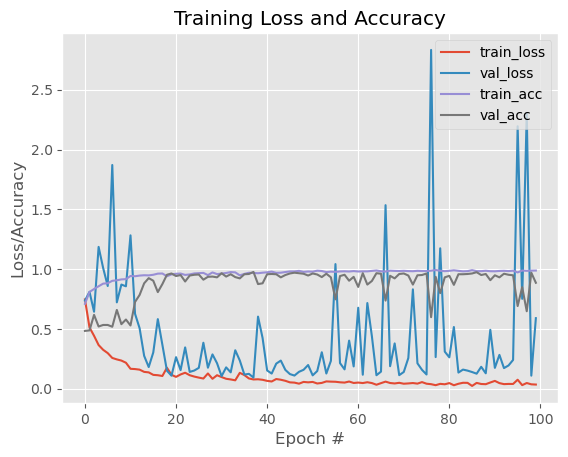

In [21]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# saving plot to disk
plt.savefig('plot.png')

In [20]:
# saving plot to disk
plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>